In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [166]:
df = pd.read_csv('Housing.csv')

In [167]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [169]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [170]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [171]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transform if needed


In [172]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [173]:
from scipy import stats

# Define a threshold (e.g., 3 standard deviations)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all values are within the threshold


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 8 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             499 non-null    int64
 1   area              499 non-null    int64
 2   bedrooms          499 non-null    int64
 3   bathrooms         499 non-null    int64
 4   stories           499 non-null    int64
 5   mainroad          499 non-null    int32
 6   guestroom         499 non-null    int32
 7   basement          499 non-null    int32
 8   hotwaterheating   499 non-null    int32
 9   airconditioning   499 non-null    int32
 10  parking           499 non-null    int64
 11  prefarea          499 non-null    int32
 12  furnishingstatus  499 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.9 KB


In [175]:
# Compute skewness for numerical columns
skewness = df.select_dtypes(include=['number']).skew()
print(skewness)


price               0.807432
area                0.847241
bedrooms            0.252559
bathrooms           1.231073
stories             1.114629
mainroad           -2.054120
guestroom           1.667694
basement            0.636897
hotwaterheating     0.000000
airconditioning     0.741466
parking             0.938608
prefarea            1.244116
furnishingstatus   -0.146200
dtype: float64


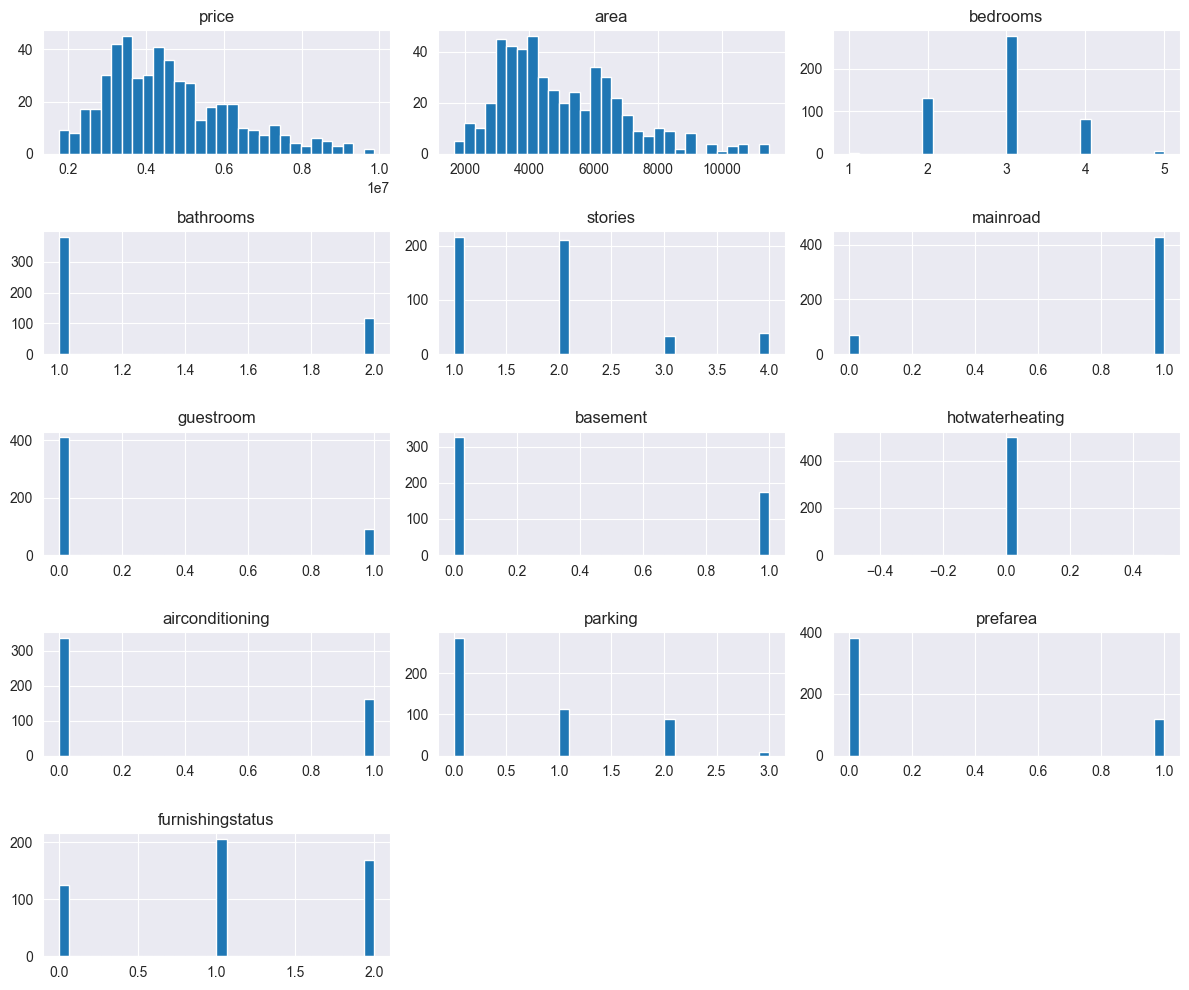

In [176]:
import math
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Determine the grid size
num_cols_count = len(num_cols)
rows = math.ceil(num_cols_count / 3)  # Adjust rows dynamically

# Plot histograms
df[num_cols].hist(figsize=(12, 10), bins=30, layout=(rows, 3))
plt.tight_layout()
plt.show()


C:\Users\davty\AppData\Local\Temp\ipykernel_11800\2950434021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(to_drop, axis=1, inplace=True)


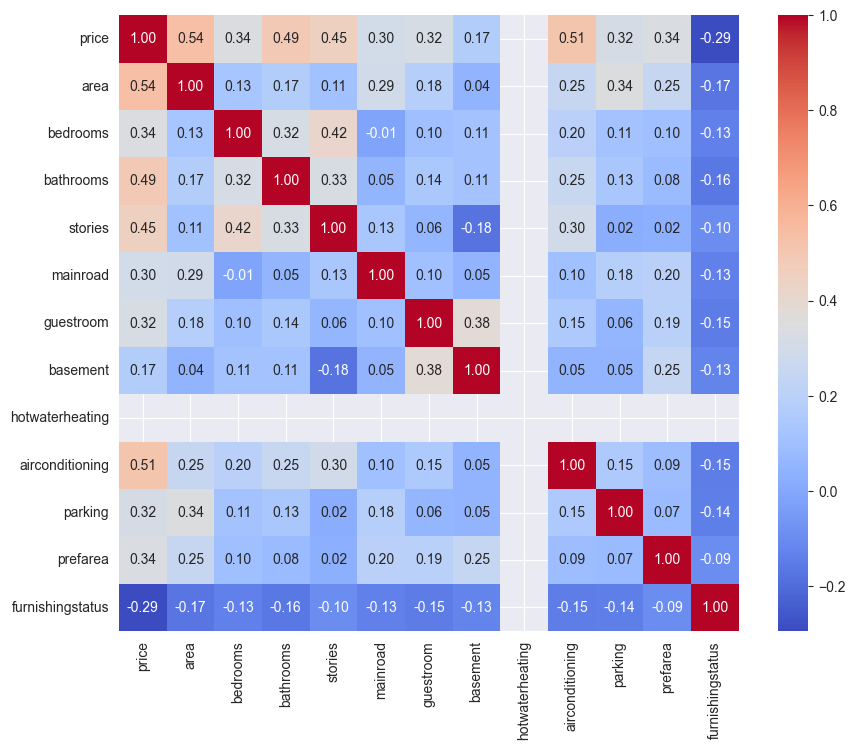

In [177]:
# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

#Drop highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]  # Adjust threshold if needed
df.drop(to_drop, axis=1, inplace=True)


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 8 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             499 non-null    int64
 1   area              499 non-null    int64
 2   bedrooms          499 non-null    int64
 3   bathrooms         499 non-null    int64
 4   stories           499 non-null    int64
 5   mainroad          499 non-null    int32
 6   guestroom         499 non-null    int32
 7   basement          499 non-null    int32
 8   hotwaterheating   499 non-null    int32
 9   airconditioning   499 non-null    int32
 10  parking           499 non-null    int64
 11  prefarea          499 non-null    int32
 12  furnishingstatus  499 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.9 KB


In [179]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [180]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use same scaler for test set


In [181]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # (batch, features, channels)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [182]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/100


D:\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 23613111533568.0000 - mae: 4577482.5000 - val_loss: 25140163248128.0000 - val_mae: 4675388.0000
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23639848124416.0000 - mae: 4588177.0000 - val_loss: 25089988886528.0000 - val_mae: 4670342.0000
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22597209161728.0000 - mae: 4507689.0000 - val_loss: 24473336020992.0000 - val_mae: 4607977.0000
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22556320989184.0000 - mae: 4486113.0000 - val_loss: 21281606991872.0000 - val_mae: 4270968.5000
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17870557806592.0000 - mae: 3949388.7500 - val_loss: 12610973990912.0000 - val_mae: 3182389.0000
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9583732981760.0000 - mae: 2752889.2500 - val_loss: 3017641558016.0000 - val_mae: 1294463.3750
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2008623874048.0000 - mae:

In [183]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1257016524800.0000 - mae: 813004.6250
Test MAE: 843958.9375


In [184]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
y_test = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_test))
r2 = r2_score(y_train, y_test)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE: 1024223.58
R² Score: 0.5817


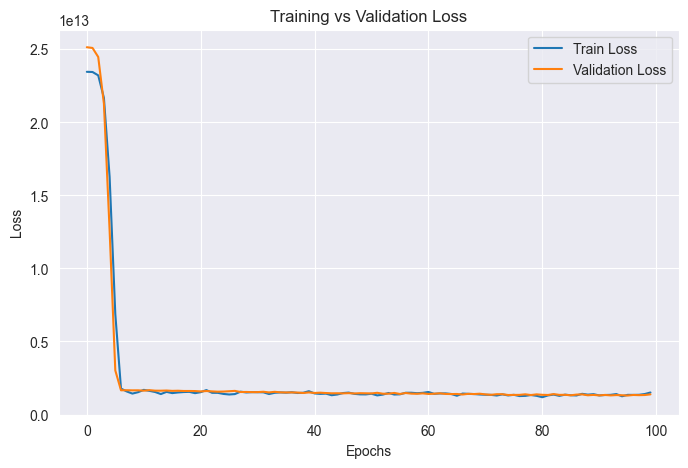

In [185]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
